# PERFORMING CLUSTERING WITH ( K-MEANS ) METHOD:


In [1]:
#importing required libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
#reading the required data: 
df = pd.read_csv('Wuzzuf_Jobs.csv')

In [3]:
#Taking over view on data:
df.head(5)

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"


### Question (1) Answer:

In [4]:
#Converting the years_exp into numbers:
df['factorized_YearsExp'] = pd.factorize(df['YearsExp'])[0]
df.head(7)

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,factorized_YearsExp
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ...",0
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin...",1
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ...",2
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an...",3
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain",4
5,Senior .NET Developer (Desktop Application),Dexef,Maadi,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"ASP.NET, Desktop Development, Information Tech...",3
6,Preschool French Teacher,Leap Development Hub,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Education, Education/Teaching",0


### Question (2) Answer:

In [5]:
#factorizing data into numerical type to deal with:
df['Title'] = pd.factorize(df['Title'])[0]
df['Company'] = pd.factorize(df['Company'])[0]
#retreving the data to show difference:
df.head(5)

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,factorized_YearsExp
0,0,0,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ...",0
1,1,1,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin...",1
2,2,2,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ...",2
3,3,0,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an...",3
4,4,3,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain",4


In [6]:
#scripting the requred data for clustring:
X = df.iloc[:, [0, 1]].values
X.view()

array([[   0,    0],
       [   1,    1],
       [   2,    2],
       ...,
       [2963, 1533],
       [2048,  133],
       [2964, 1533]], dtype=int64)

In [7]:
#importing required classes:
from sklearn.cluster import KMeans

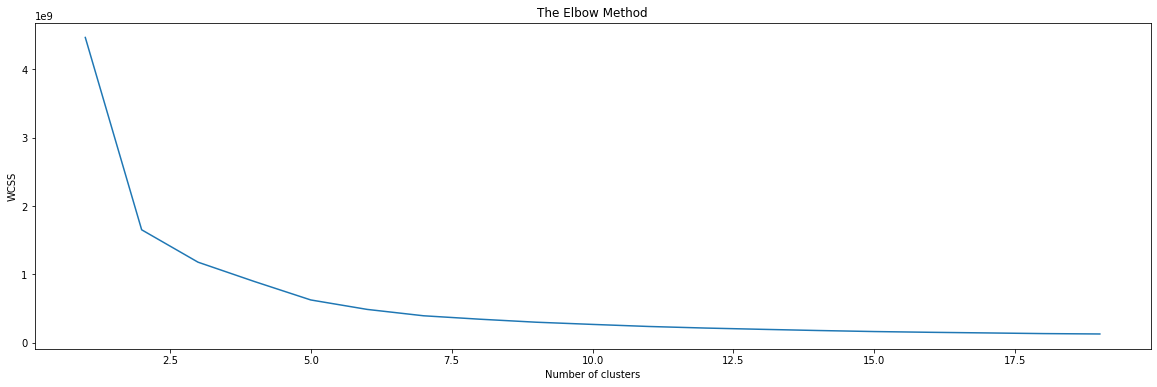

In [8]:
## Using the elbow method to find the optimal number of clusters(k-numbers):
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(20, 6))   
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### >>> Another method for finding (k-numbers):

In [15]:
#importing kneed and using kneelocator:
from kneed import KneeLocator
K = KneeLocator(range(1, 20), wcss, curve="convex", direction="decreasing")
print(K.elbow)

5


Here we know that the number of clusters is:
### (5)

In [17]:
# Fitting K-Means to the data:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

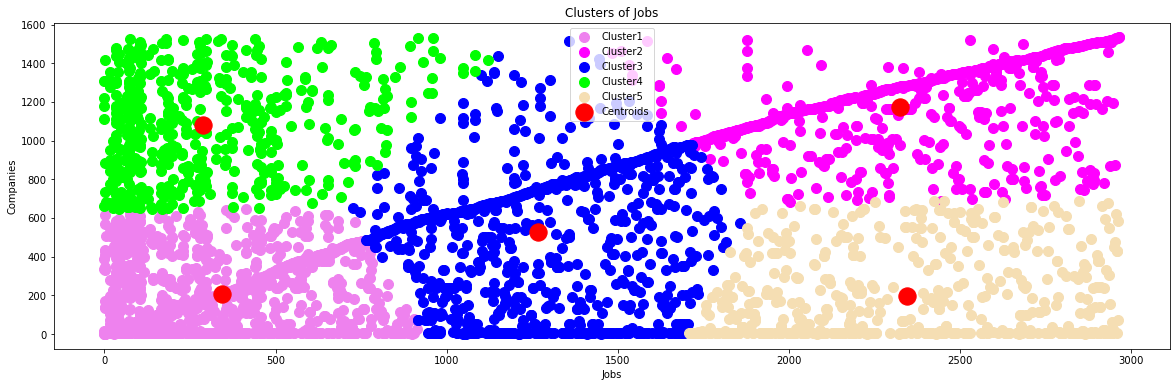

In [26]:
#distincting each cluster:
plt.subplots(figsize=(20, 6)) 
for i in range(K.elbow):
    color_list = ['violet', 'magenta', 'blue', 'lime', 'wheat','tan', 'coral']
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=color_list[i], label=f'Cluster{i+1}')

    #-----------------------------------------------------------------------------------#
    
#Visulazing the clusters:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Jobs')
plt.xlabel('Jobs')
plt.ylabel('Companies')
plt.legend(loc='upper center')
plt.show()        